In [2]:
# Performed as a part of curriculum at Great Learning
# Using both Red and White wine dataset and combining them to create a NN model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

In [9]:
red=pd.read_csv('/content/sample_data/red.csv',sep=';')
white=pd.read_csv('/content/sample_data/white.csv')

In [10]:
red.info()
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column        

In [19]:
red.shape

(1599, 12)

In [20]:
white.shape

(6463, 13)

In [21]:
white['type']=0
red['type']=1

In [11]:
red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [12]:
white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [13]:
white.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [14]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Dropping the null values
white=white.dropna()

In [22]:
white.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


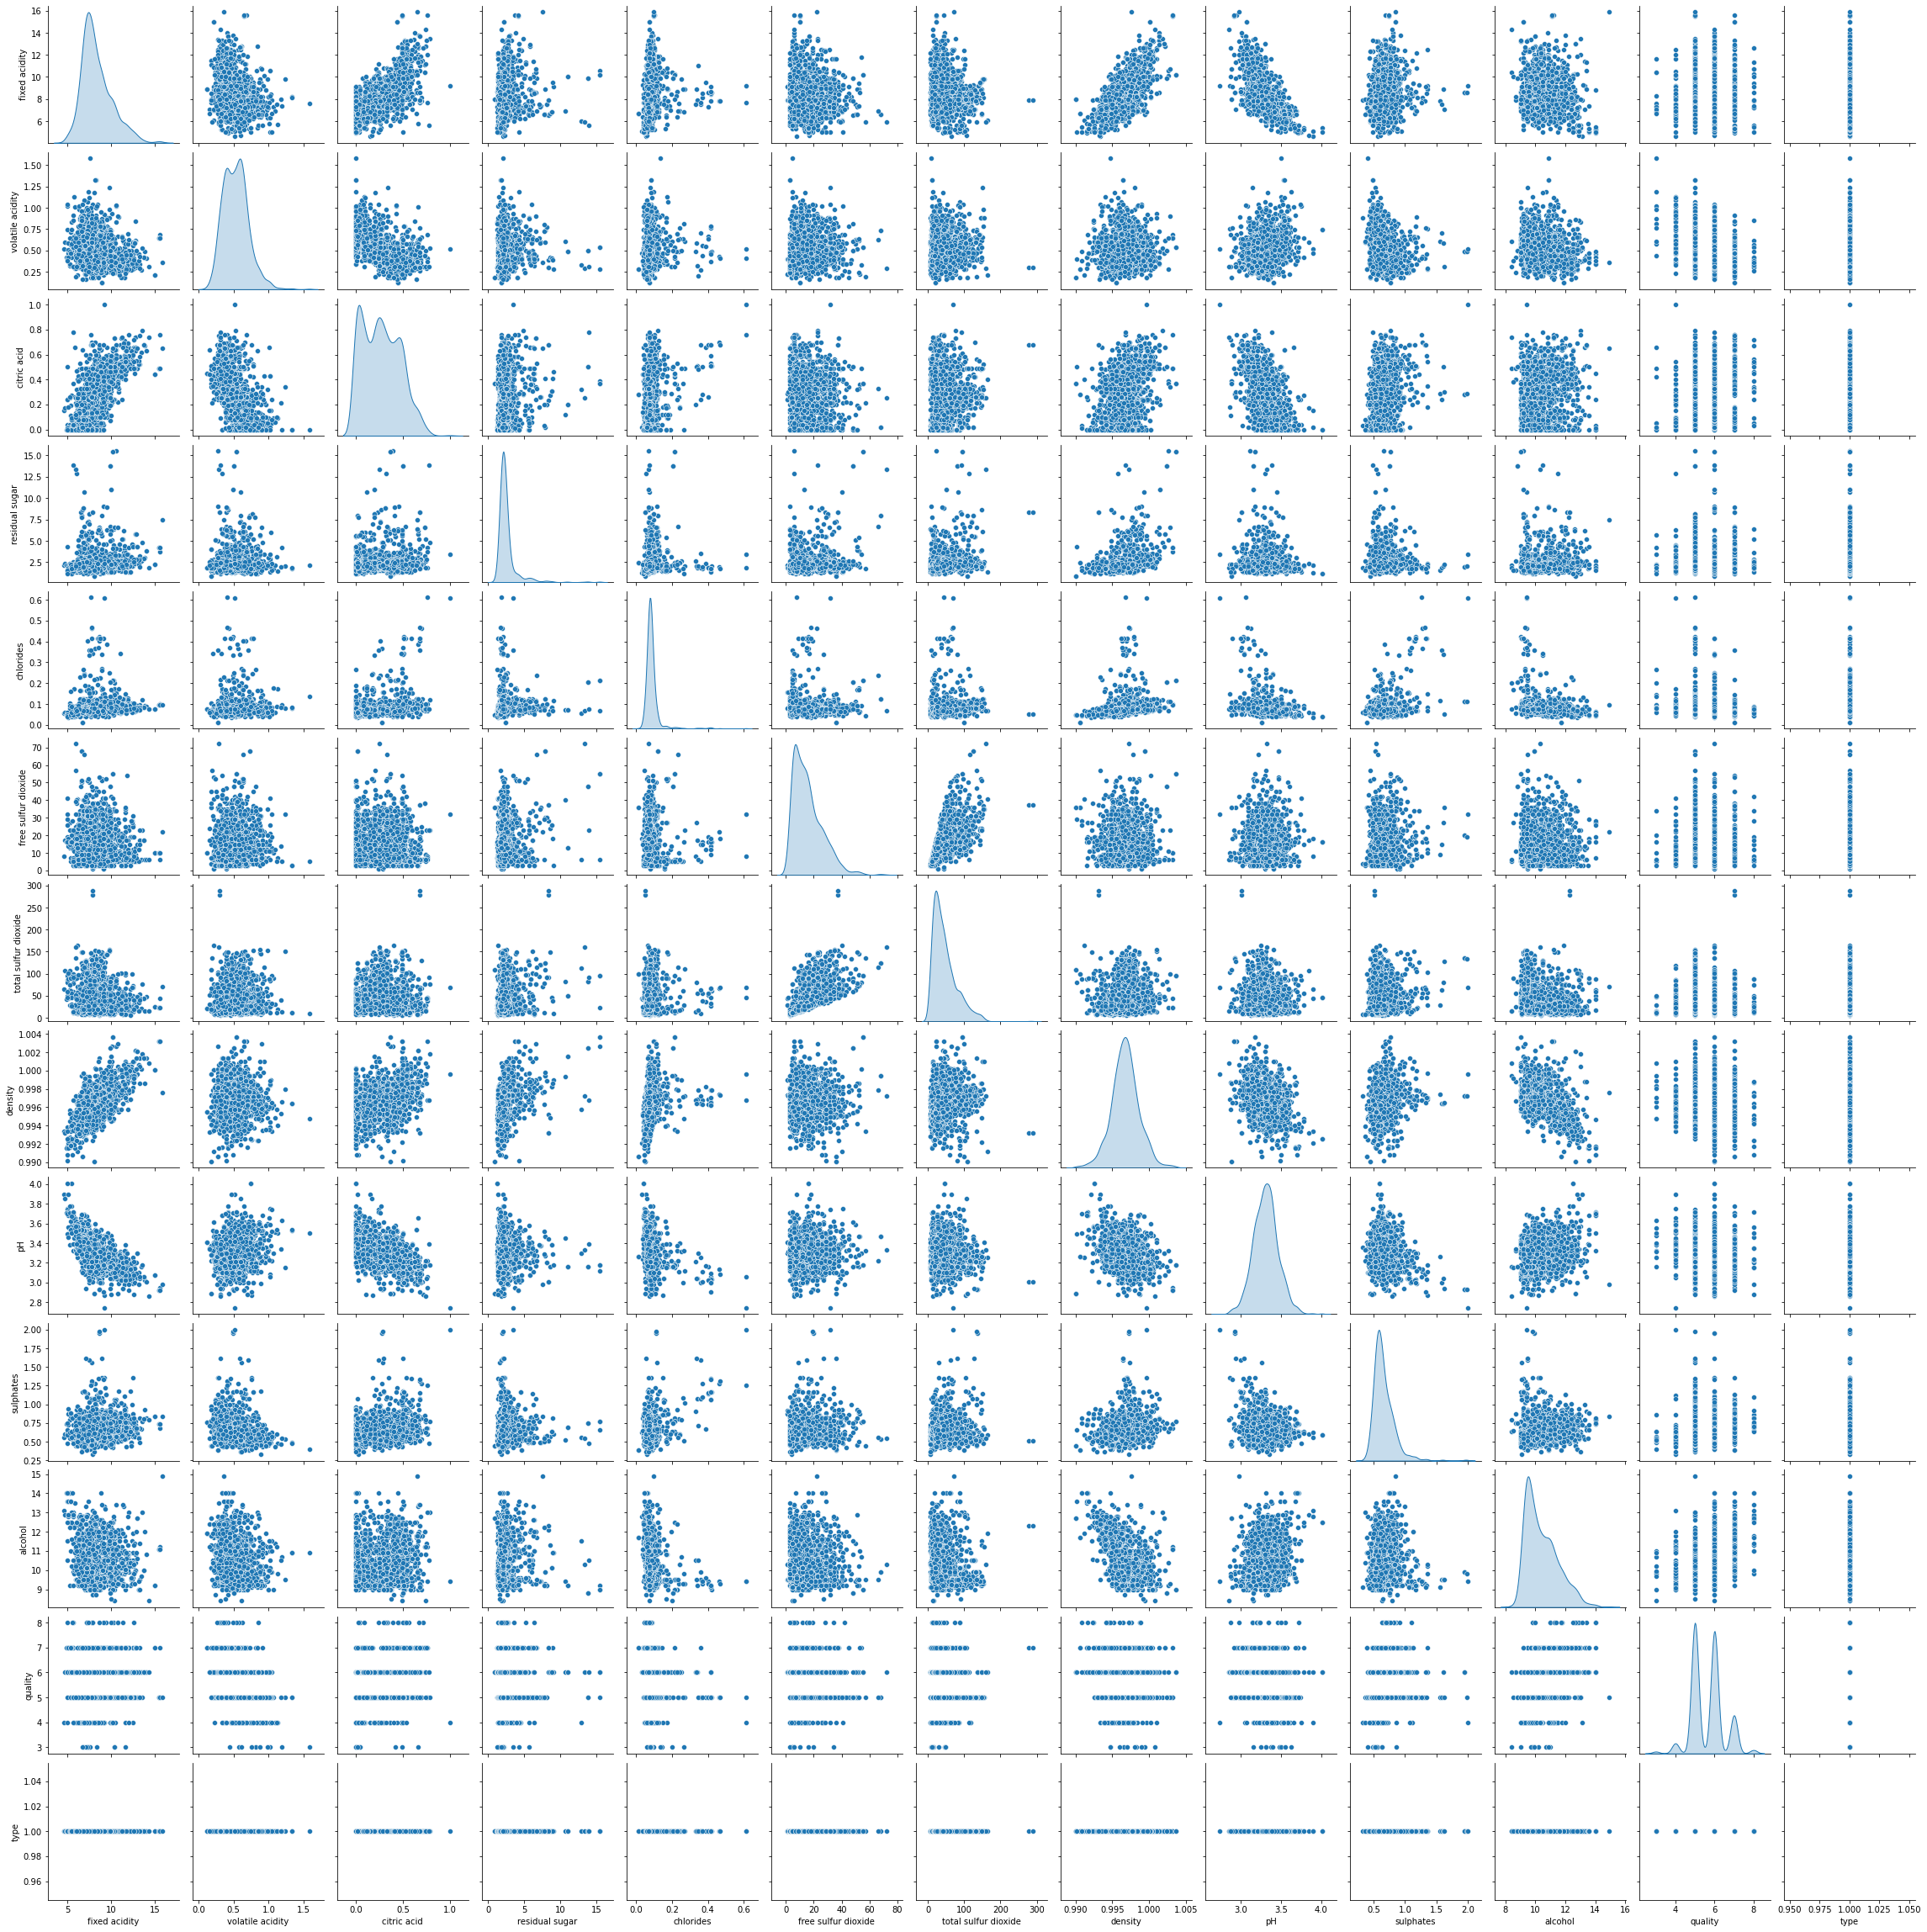

In [23]:
import seaborn as sns
sns.pairplot(data=red,diag_kind='kde')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


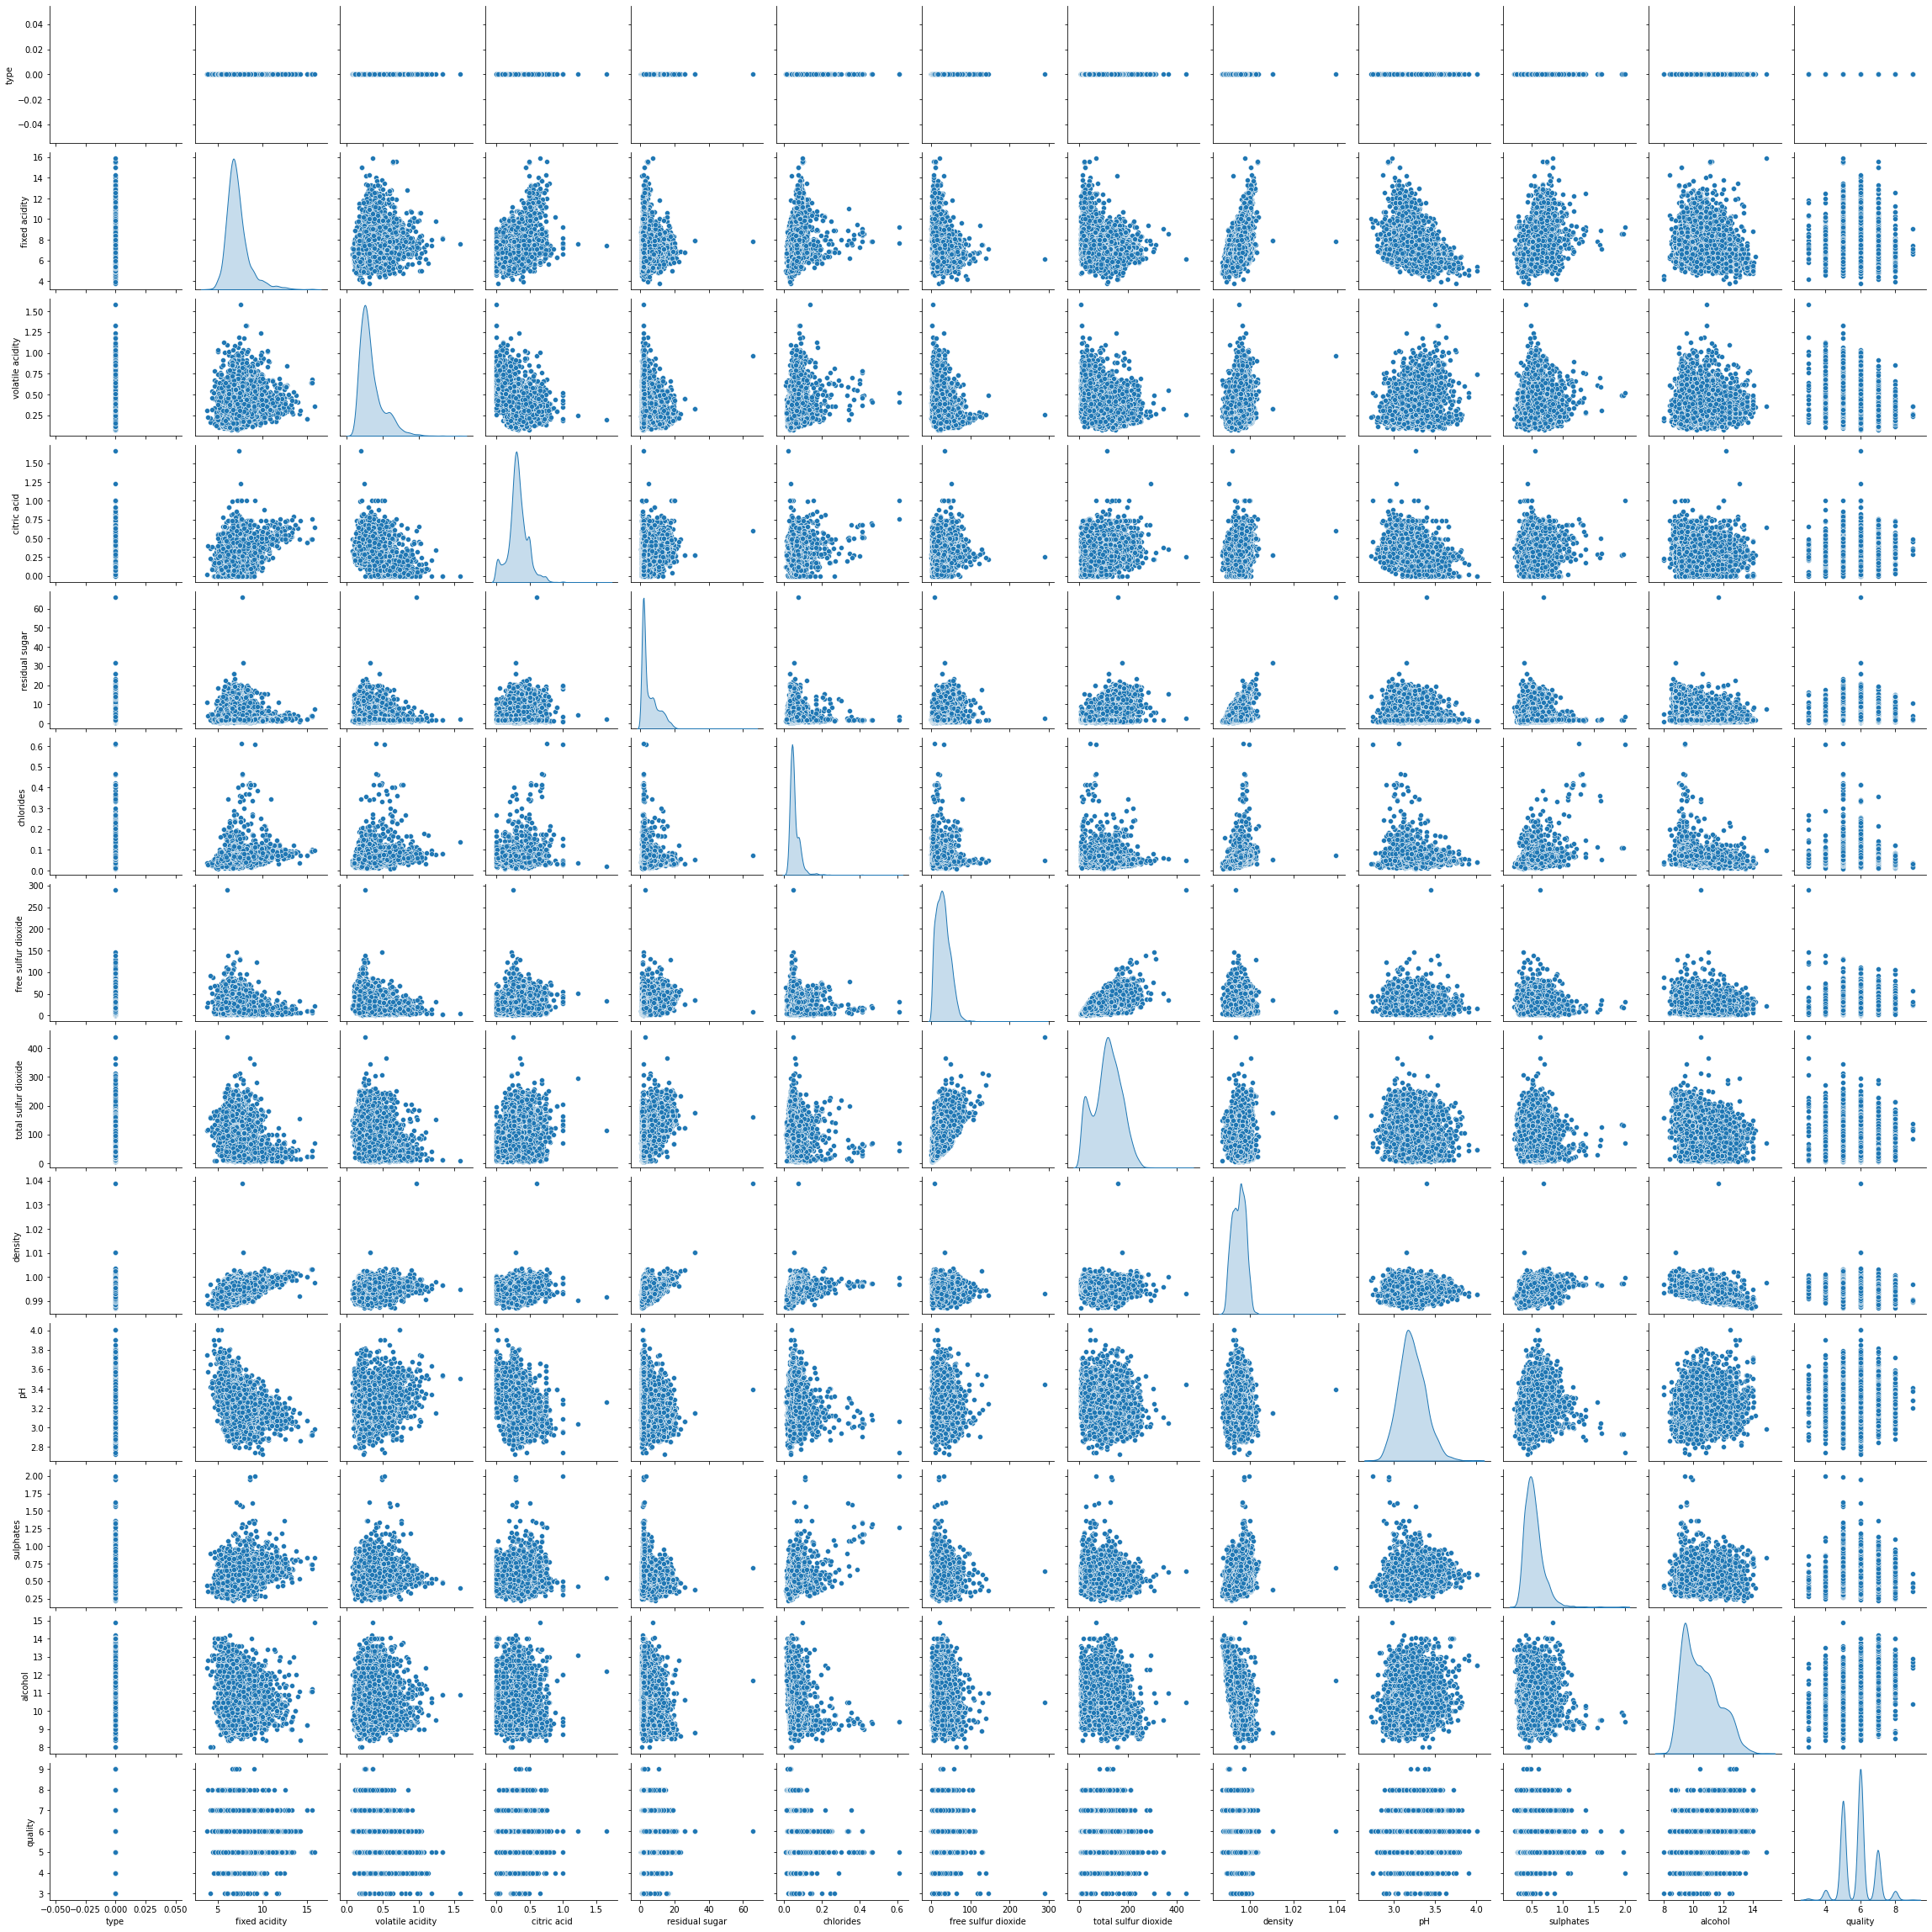

In [24]:
import seaborn as sns
sns.pairplot(data=white,diag_kind='kde')

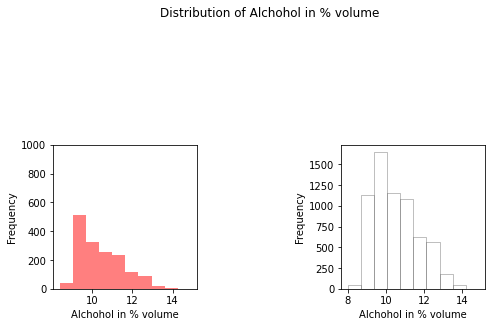

In [27]:
fig,ax=plt.subplots(1,2)
ax[0].hist(red.alcohol,10,facecolor='red',alpha=0.5,label="Red Wine")
ax[1].hist(white.alcohol,10,facecolor='white',ec="black",lw=0.5,alpha=0.5,label="White Wine")
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=1)
ax[0].set_ylim([0,1000])
ax[0].set_xlabel("Alchohol in % volume")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alchohol in % volume")
ax[1].set_ylabel("Frequency")
fig.suptitle("Distribution of Alchohol in % volume")
plt.show()

In [28]:
red['type']=1
white['type']=0

In [29]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [30]:
white.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
# Combining the datasets
wines=red.append(white,ignore_index=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [33]:
wines.shape

(8062, 13)

In [34]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
8057,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
8058,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
8059,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
8060,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
8061,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,0


In [46]:
from sklearn.model_selection import train_test_split
y=wines['type']
x=wines.drop(['alcohol','type'],axis=1)

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
Y_test[0:10]

742     1
2126    0
3689    0
4586    0
6289    0
1302    1
1168    1
7139    0
3049    0
2778    0
Name: type, dtype: int64

In [51]:
# Transforming the input variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

In [52]:
X_test=scaler.transform(X_test)

In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [55]:
# Building the Neural network model
model=Sequential()
model.add(Dense(12,activation='sigmoid',input_shape=(11,)))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
# Applying the model on the dataset
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,Y_train,epochs=20,batch_size=1,verbose=1)

Epoch 1/20
6449/6449 [==============================] - 6s 932us/step - loss: 0.3466 - accuracy: 0.8040
Epoch 2/20
6449/6449 [==============================] - 6s 920us/step - loss: 0.2925 - accuracy: 0.8006
Epoch 3/20
6449/6449 [==============================] - 6s 937us/step - loss: 0.2883 - accuracy: 0.8059
Epoch 4/20
6449/6449 [==============================] - 6s 916us/step - loss: 0.2870 - accuracy: 0.8007
Epoch 5/20
6449/6449 [==============================] - 6s 914us/step - loss: 0.2857 - accuracy: 0.8040
Epoch 6/20
6449/6449 [==============================] - 6s 921us/step - loss: 0.2848 - accuracy: 0.8074
Epoch 7/20
6449/6449 [==============================] - 6s 933us/step - loss: 0.2846 - accuracy: 0.8038
Epoch 8/20
6449/6449 [==============================] - 6s 942us/step - loss: 0.2845 - accuracy: 0.8021
Epoch 9/20
6449/6449 [==============================] - 6s 924us/step - loss: 0.2841 - accuracy: 0.8035
Epoch 10/20
6449/6449 [==============================] - 6s 917u

In [58]:
y_pred=np.round(model.predict(X_test))
y_pred[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [60]:
# Comparing the train and test accuracies
loss_train,acc_train=model.evaluate(X_train,Y_train,verbose=0)
print("Train Accuracy: %.3f" % acc_train)
loss_test,acc_test=model.evaluate(X_test,Y_test,verbose=0)
print("Test Accuracy: %.3f" % acc_test)

Train Accuracy: 0.804
Test Accuracy: 0.794
